In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import numpy as np

img_dir = 'C:/Users/jmin7/Desktop/Desktop/one'
word = ['0', '1','2']

try:
    for key in word:
        os.makedirs(img_dir + f'\\{key}')
except:
    pass

FileList = os.listdir(img_dir)
FileList = [x for x in FileList if 'jpg' in x] 
for file in FileList:
    label = file.split('-')[0]
    targetPath = img_dir + f'\\{label}'
    try:
        shutil.move(img_dir + f'\\{file}', targetPath + f'\\{file}')
    except:
        pass

try:
    for key in word_Desktop:
        os.makedirs(img_dir_Desktop + f'\\{key}')
except:
    pass

trainDataGen = ImageDataGenerator( 
                             rescale=1./255,
                             zoom_range = [1.0,1.0],
                             brightness_range = [1,1.0],
                             # rotation_range = 0,
                             # horizontal_flip = False,
                             # vertical_flip = False,
                             height_shift_range = 0.2,
                             width_shift_range = 0.15)

save_dir = 'C:/Users/jmin7/Desktop/Desktop/two'
try:
    for key in word:
        os.makedirs(save_dir + f'\\{key}')
except:
    pass

for img_name in word:
    img_arr = len(os.listdir(img_dir + '/' + img_name))
    for y in range(img_arr):
        img_key =  str(y) + '.jpg'
        img_path = os.path.join(img_dir + '/' + img_name, img_key)
        img = image.load_img(img_path, target_size=(128,128)) # target_size=(32,32))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis = 0)
        i = 0
        for batch in trainDataGen.flow(img_tensor, batch_size=1, save_to_dir=save_dir+ '/' + img_name, save_prefix= img_name, save_format='PNG'):
            i += 1
            if i>29:
                break
    print(img_name + ' end')

0 end
1 end
2 end


In [7]:
img_path = 'C:/Users/jmin7/Desktop/Desktop/two'

import os
import cv2
import numpy as np

count = 0
images = []
classNo = []
File_List = os.listdir(img_path)
print("Total Classes :",len(File_List))

Classes=len(File_List)

for x in range (len(File_List)):
    Pic_List = os.listdir(img_path+"/"+str(count)) 
    for y in Pic_List:
        curImg = cv2.imread(img_path+"/"+str(count)+"/"+y) 
        images.append(curImg)
        classNo.append(count) 
    count += 1
images = np.array(images)
classNo = np.array(classNo)
print(images)
classNo
images.shape
File_List

Total Classes : 3
[[[[253 253 253]
   [250 250 250]
   [230 230 230]
   ...
   [246 244 243]
   [246 244 243]
   [246 244 243]]

  [[253 253 253]
   [250 250 250]
   [230 230 230]
   ...
   [246 244 243]
   [246 244 243]
   [246 244 243]]

  [[253 253 253]
   [250 250 250]
   [230 230 230]
   ...
   [246 244 243]
   [246 244 243]
   [246 244 243]]

  ...

  [[249 249 249]
   [246 246 246]
   [234 234 234]
   ...
   [245 243 240]
   [245 243 240]
   [245 243 240]]

  [[246 246 246]
   [245 245 245]
   [237 237 237]
   ...
   [245 243 241]
   [245 243 241]
   [245 243 241]]

  [[232 232 232]
   [235 235 235]
   [251 251 251]
   ...
   [245 243 242]
   [245 243 242]
   [245 243 242]]]


 [[[229 229 229]
   [239 239 239]
   [253 253 253]
   ...
   [ 21  21  21]
   [ 21  21  21]
   [ 21  21  21]]

  [[238 238 238]
   [239 239 239]
   [244 243 243]
   ...
   [ 21  21  21]
   [ 21  21  21]
   [ 21  21  21]]

  [[249 249 249]
   [240 240 240]
   [230 229 229]
   ...
   [ 21  21  21]
   [ 21  2

['0', '1', '2']

In [8]:
from sklearn.model_selection import train_test_split

testRatio = 0.2
validationRatio = 0.2

X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)

from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train,Classes)
y_validation = to_categorical(y_validation,Classes)
y_test = to_categorical(y_test,Classes)

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Dropout, Flatten 
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv2D, MaxPooling2D

image_size = (128,128,3)

def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_Of_Nodes = 500
    model= Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter,
                      input_shape=(image_size[0], image_size[1], 1),
                      activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(Classes,activation='softmax'))
    
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = myModel()

import math

batch_size_val = 20
steps_per_epoch_val = math.floor(len(X_train)/batch_size_val)
epochs_val=30

In [9]:
result=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),
                 steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,
                 validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/30
31/31 [==============================] - 68s 2s/step - loss: 1.0657 - accuracy: 0.5615 - val_loss: 0.6356 - val_accuracy: 0.7308
Epoch 2/30
31/31 [==============================] - 68s 2s/step - loss: 0.6191 - accuracy: 0.7641 - val_loss: 0.3332 - val_accuracy: 0.8462
Epoch 3/30
31/31 [==============================] - 66s 2s/step - loss: 0.4266 - accuracy: 0.8322 - val_loss: 0.3008 - val_accuracy: 0.8782
Epoch 4/30
31/31 [==============================] - 65s 2s/step - loss: 0.4008 - accuracy: 0.8289 - val_loss: 0.2989 - val_accuracy: 0.8782
Epoch 5/30
31/31 [==============================] - 65s 2s/step - loss: 0.2927 - accuracy: 0.8870 - val_loss: 0.1486 - val_accuracy: 0.9679
Epoch 6/30
31/31 [==============================] - 65s 2s/step - loss: 0.2680 - accuracy: 0.9070 - val_loss: 0.1420 - val_accuracy: 0.9872
Epoch 7/30
31/31 [==============================] - 66s 2s/step - loss: 0.1806 - accuracy: 0.9336 - val_loss: 0.0545 - val_accuracy: 0.9744
Epoch 8/30
31/31 [==

In [10]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

model_save_path = 'C:/Users/jmin7/Desktop/Desktop/model_trained_data.h5'
model.save(model_save_path)

Test Score: 0.0016188378212973475
Test Accuracy: 1.0


1/1 [==============================] - 0s 70ms/step
0.99996424
[0]
fire


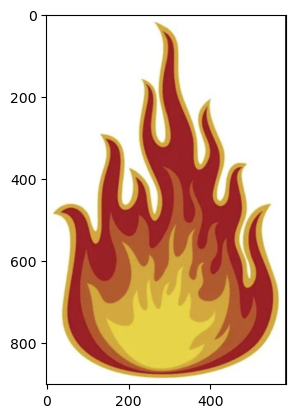

In [11]:
import cv2
import os

path = 'C:/Users/jmin7/Desktop/Desktop/three'

from tensorflow.keras.models import load_model
model_save_path = 'C:/Users/jmin7/Desktop/Desktop/model_trained_data.h5'
model = load_model(model_save_path)

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np
np.set_printoptions(precision=8, suppress=True)

def preprocessing_predict(pred_img):
    pred_img_path = os.path.join(path, pred_img)
    pred_img_Equ = cv2.imread(pred_img_path, 0)   
    pred_img_Equ = cv2.equalizeHist(pred_img_Equ)
    pred_img_Equ = pred_img_Equ/255

    pred_img_Equ = cv2.resize(pred_img_Equ, (128, 128))
    pred_img_Equ = pred_img_Equ.reshape(1, 128, 128, 1)
    
    image = img.imread(path + '/' + pred_img)
    plt.imshow(image) 
    
    return pred_img_Equ

def result(predict_result):
    total = model.predict(predict_result)
    probabilityValue = np.amax(total)
    y_prob = model.predict(predict_result)
    print(probabilityValue)
    classIndex = y_prob.argmax(axis=-1)
    print(classIndex)
    
    if(classIndex == 0):
        print('fire')
    elif(classIndex == 1):
        print('human')
    elif(classIndex == 2):
        print('water')
        
    return

predict = preprocessing_predict('0.jpg')
result(predict)

1/1 [==============================] - 0s 80ms/step
0.9999964
[1]
human


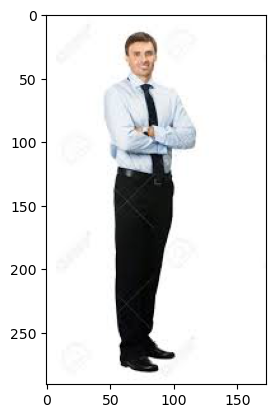

In [12]:
predict = preprocessing_predict('1.jpg')
result(predict)

1/1 [==============================] - 0s 92ms/step
0.99999976
[2]
water


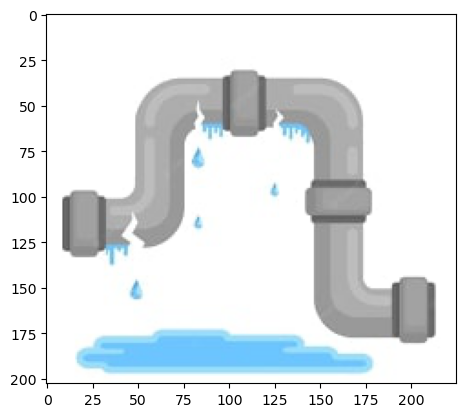

In [13]:
predict = preprocessing_predict('2.jpg')
result(predict)